In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
import string

import os


In [2]:
#defining the directories for ease of use
mother_directory = os.getcwd()
data_directory = "../input/imdb-movie-ratings-sentiment-analysis/movie.csv"

In [3]:
#putting the data into a pandas dataframe
data = pd.read_csv(data_directory)

In [4]:
data.head()

,text,label
0,I grew up (b. 1965) watching and loving the Th...,0
1,"When I put this movie in my DVD player, and sa...",0
2,Why do people who do not know what a particula...,0
3,Even though I have great interest in Biblical ...,0
4,Im a die hard Dads Army fan and nothing will e...,1


In [5]:
print(data["text"].iloc[19])

A friend told me of John Fante last summer after we got into a conversation about Charles Bukowski. I did not know that Fante was a favorite writer of Bukowski's - an author with similar edge and humor except from one generation earlier. 'Ask the Dust' was the first Fante book I read, and it remains one of my favorite novels. The novel was a brilliant piece of writing about a sad, frightened young writer posing to himself and the outside world as an overconfident, masterfully talented author who had no idea how to write about the real world experiences he had none of. In the novel the protagonist is a virgin, with no idea how to win the graces of the women he desperately wants to write about in magazines. The story of his bizarre relationship with Camilla, how he settles for his first sexual experience with a 'wounded' admirer, and how he eventually is left with nothing but the story of his failed attempts at love is biting and real, with no touching Hollywood ending. The film adaptati

In [6]:
#Here we look at each text to decide about the proper length of data.
max_length = 0
for sentence in data["text"]:
    new_sentence = sentence.translate(str.maketrans("","",string.punctuation))
    #print(new_sentence)
    length = len(new_sentence.split(" "))
    if length > max_length:
        max_length = length

In [7]:
data["label"].value_counts()

0    20019
1    19981
Name: label, dtype: int64

In [8]:
#With this function we will assign each word in the dataset, an integer. This function returns a dictionary 
def tokenize_the_data_from_pandas(dataframe,column_name): # This function returns tokens dictionary that includes every unique word as keys and unique integers for each key.
    #Here I cleaned the string out of punctuations.
    import string
    for sent in range(len(data[column_name])):
        example_sentence = data[column_name].iloc[sent]
        new_sentence = example_sentence.translate(str.maketrans("","",string.punctuation))
        data[column_name].iloc[sent] = new_sentence
    #Here I created a dictionary that will encode each word into an integer to have a representation of the word in the deep neural networks processes
    tokens = {}
    for sent in range(len(data[column_name])):
        example_sentence = data[column_name].iloc[sent]
        values = example_sentence.split(" ")
        for word in values:
            tokens[word] = 0
         
    names = list(tokens.keys())
    for num in range(len(names)):
        tokens[names[num]] = num+1
        
    return tokens

In [9]:
tokens = tokenize_the_data_from_pandas(data,column_name="text")


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [10]:
len(tokens.keys())

190010

In [11]:
#Creating the data vectors.
X = []
y = []
for sent in range(len(data["text"])):
    example_sentence = data["text"].iloc[sent]
    values = example_sentence.split(" ")
    for word in range(len(values)):
        values[word] = tokens[values[word]]
    X.append(values)
    y.append(data["label"].iloc[sent])
    

#This code will pad the sequences with zeros to make every input the same length.
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_length = max_length
padded_docs = pad_sequences(X, maxlen=max_length, padding='post')
#the code below changes the final data lists into numpy arrays so that we can train our neural network with.    
X_ar = np.array(padded_docs)
y_ar = np.array(y)
#Here we split our data into train and test sets.
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_ar,y_ar,test_size=0.1,random_state = 10)

In [12]:
#This is a 1D convolutional model for the task
model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(190020,200,input_length=2470))#This embedding layer reduces the data dimension from 290 to 10 by creating relations and using floating numbers to represent the words.
model.add(tf.keras.layers.Conv1D(32,7,activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(5))
model.add(tf.keras.layers.Conv1D(64,7,activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(5))

model.add(tf.keras.layers.Conv1D(64,7,activation="relu"))
model.add(tf.keras.layers.MaxPooling1D(5))

#model.add(tf.keras.layers.GlobalMaxPooling1D())
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = "adam",loss="binary_crossentropy",metrics=["accuracy"])
model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1125/1125 [==============================] - 38s 27ms/step - loss: 0.3441 - accuracy: 0.8283 - val_loss: 0.2081 - val_accuracy: 0.9165
Epoch 2/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0964 - accuracy: 0.9672 - val_loss: 0.2513 - val_accuracy: 0.8995
Epoch 3/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0163 - accuracy: 0.9953 - val_loss: 0.5423 - val_accuracy: 0.8910
Epoch 4/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.6691 - val_accuracy: 0.8770
Epoch 5/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0114 - accuracy: 0.9964 - val_loss: 0.4928 - val_accuracy: 0.8913
Epoch 6/10
1125/1125 [==============================] - 30s 27ms/step - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.6282 - val_accuracy: 0.8913
Epoch 7/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.6312 -

In [13]:
y_pred=model.predict(X_test[:])

In [14]:
#We turn our networks output into binary values
y_pred[y_pred>0.5] = 1
y_pred[y_pred< 0.5] = 0

In [15]:
Truth = 0
Falset = 0
for pik in range(len(y_pred)):
    
    result = y_pred[pik] == y_test[pik]
    if False in result:
        Falset += 1 
    else:
        Truth += 1
    
    #print(y_pred[pik] == y_test[pik])

In [16]:
print(Truth,Falset)

3599 401


In [17]:
print("accuracy:",Truth / (Truth + Falset))

accuracy: 0.89975


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report


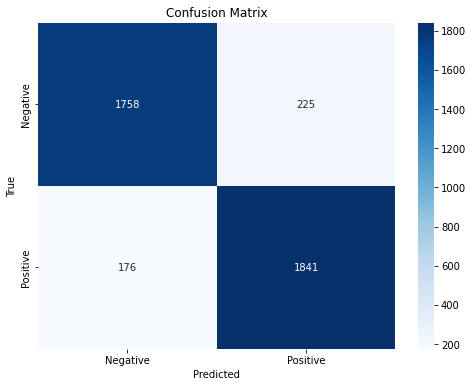

In [19]:
# Assuming y_test and y_pred are true labels and predicted labels, respectively
cm = confusion_matrix(y_test, y_pred)

# Plotting Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [20]:
# Assuming y_test and y_pred are your true labels and predicted labels, respectively
classification_rep = classification_report(y_test, y_pred, target_names=['Negative', 'Positive'])

# Displaying Classification Report
print(classification_rep)


              precision    recall  f1-score   support

    Negative       0.91      0.89      0.90      1983
    Positive       0.89      0.91      0.90      2017

    accuracy                           0.90      4000
   macro avg       0.90      0.90      0.90      4000
weighted avg       0.90      0.90      0.90      4000



Epoch 1/10
1125/1125 [==============================] - 30s 27ms/step - loss: 0.0131 - accuracy: 0.9967 - val_loss: 0.6966 - val_accuracy: 0.8907
Epoch 2/10
1125/1125 [==============================] - 30s 26ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 0.6737 - val_accuracy: 0.8947
Epoch 3/10
1125/1125 [==============================] - 30s 26ms/step - loss: 7.6871e-04 - accuracy: 0.9998 - val_loss: 0.7910 - val_accuracy: 0.8960
Epoch 4/10
1125/1125 [==============================] - 30s 26ms/step - loss: 2.6420e-05 - accuracy: 1.0000 - val_loss: 0.8129 - val_accuracy: 0.8982
Epoch 5/10
1125/1125 [==============================] - 30s 27ms/step - loss: 6.6332e-06 - accuracy: 1.0000 - val_loss: 0.8417 - val_accuracy: 0.8990
Epoch 6/10
1125/1125 [==============================] - 30s 27ms/step - loss: 3.3545e-06 - accuracy: 1.0000 - val_loss: 0.8719 - val_accuracy: 0.8997
Epoch 7/10
1125/1125 [==============================] - 30s 26ms/step - loss: 1.6713e-06 - accuracy: 1.0000 

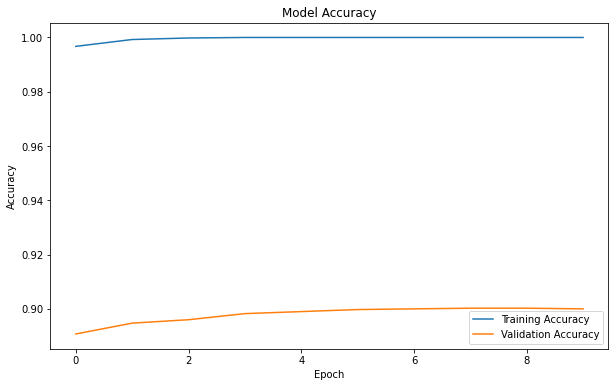

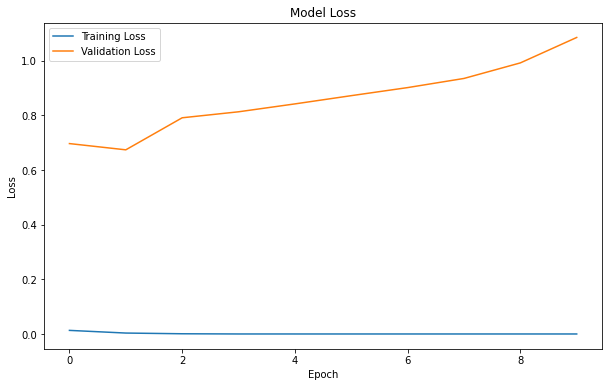

In [21]:
import matplotlib.pyplot as plt

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

plt.figure(figsize=(10, 6))

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()

plt.figure(figsize=(10, 6))

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Model Loss')
plt.show()


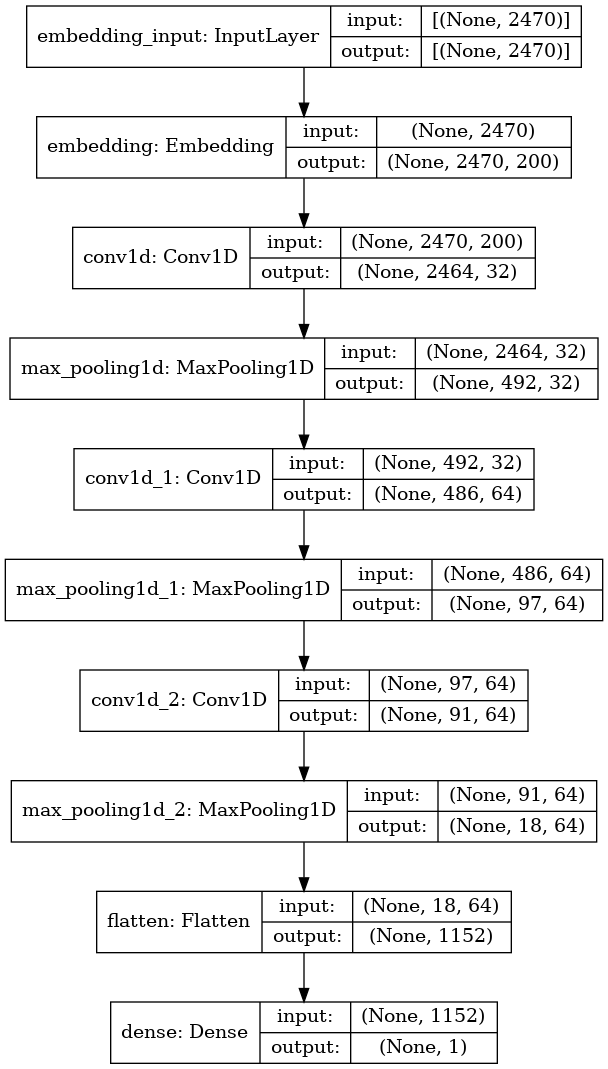

In [24]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model_structure.png', show_shapes=True)
